<a href="https://colab.research.google.com/github/mikemykhaylov/MAT-494/blob/main/2_3_Independent_variables_and_random_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.9 MB/s eta 0:00:00


In [2]:
from google.colab import output

output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib widget

# 2.2 Independent variables and random samples

Topics of this chapter
- Joint probability distributions
- Correlation and dependence
- Random samples

## Joint probability distributions

### Discrete random variables
A **joint probability distribution** of two discrete random variables $X$ and $Y$ is a function $p(x,y)$ such that for any two sets of real numbers $A$ and $B$ we have
$$
P(X \in A, Y \in B) = \sum_{x \in A} \sum_{y \in B} p(x,y)
$$
The function $p(x,y)$ is called a **joint probability mass function**.

In [5]:
def joint_pmf(p, x, y):
    # For simplicity, assume a trivial pmf. In a real-world scenario, you would compute based on data.
    return p[x][y]


p = {"x1": {"y1": 0.1, "y2": 0.2}, "x2": {"y1": 0.3, "y2": 0.4}}
print(joint_pmf(p, "x1", "y1"))

0.1


### Continuous random variables
A **joint probability distribution** of two continuous random variables $X$ and $Y$ is a function $p(x,y)$ such that for any two sets of real numbers $A$ and $B$ we have
$$
P(X \in A, Y \in B) = \int_{x \in A} \int_{y \in B} p(x,y) dx dy
$$
The function $p(x,y)$ is called a **joint probability density function**.

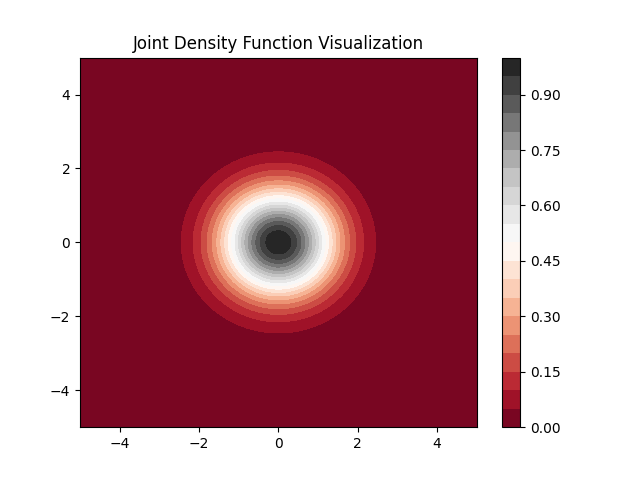

In [6]:
# Create a basic joint density function
def joint_density(x, y):
    return np.exp(-(x**2 + y**2) / 2)


x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = joint_density(X, Y)

fig = plt.figure()

plt.contourf(X, Y, Z, 20, cmap="RdGy")
plt.colorbar()
plt.title("Joint Density Function Visualization")
plt.show()

## Correlation and dependence
Two random variables $X$ and $Y$ are called **independent** if for any two sets of real numbers $A$ and $B$ we have
$$
P(X \in A, Y \in B) = P(X \in A) P(Y \in B)
$$
Otherwise, $X$ and $Y$ are called **dependent**.

In [7]:
def are_independent(p_X, p_Y, p_joint, x, y):
    return p_joint(p, x, y) == p_X(x) * p_Y(y)


# Example check
def p_X(x):
    return 0.5


def p_Y(y):
    return 0.5


print(are_independent(p_X, p_Y, joint_pmf, "x1", "y1"))

False


### Correlation coefficient
The **correlation coefficient** of two random variables $X$ and $Y$ is defined as
$$
\rho(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}
$$
where $Cov(X,Y)$ is the **covariance** of $X$ and $Y$.

In [8]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 4, 1, 3, 5])

correlation_coefficient = np.corrcoef(x_data, y_data)[0, 1]
print(correlation_coefficient)

0.49999999999999994


## Random samples
A **random sample** of size $n$ from a population is a set of $n$ independent and identically distributed random variables $X_1, \dots, X_n$.

### Central limit theorem
Let $X_1, \dots, X_n$ be a random sample of size $n$ from a population with mean $\mu$ and variance $\sigma^2$. Then the random variable
$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$
has a standard normal distribution.

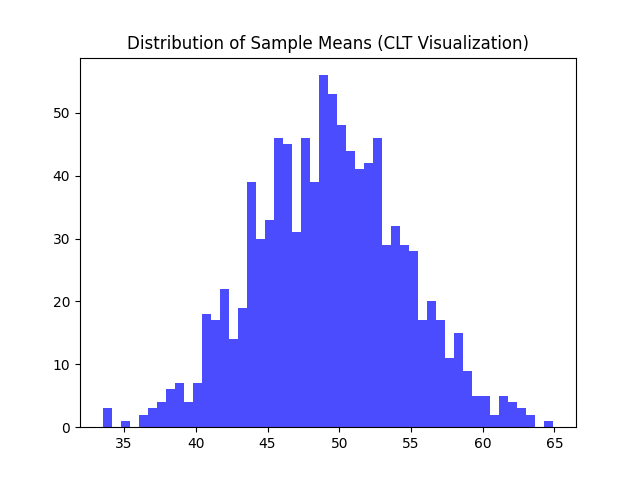

In [9]:
sample_means = []

for _ in range(1000):
    sample = np.random.randint(0, 100, 30)  # Take a random sample of size 30
    sample_means.append(np.mean(sample))

fig = plt.figure()
plt.hist(sample_means, bins=50, color="blue", alpha=0.7)
plt.title("Distribution of Sample Means (CLT Visualization)")
plt.show()